<font color='483D8B'> 
    
# Исследование закономерностей, определяющих успешность игр
    
    
    
<font color='6A5ACD'> 
    
    
    
### Из открытых источников мне доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

В ходе данного исследования мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    
### Цель исследования:
    
    
   
    
- Определить зависимость количества продаж от: года, города, платформы, отзывов пользователей и жанра игры.
    
    
- Выявить наиболее популярные платформы и жанры для каждого региона
    
### Ход исследования
    
Данные я получу из файла '/datasets/games.csv.', так как мне неизвестно ничего о качестве данных, перед тем, как  приступать к целям исследования, понадобится обзор данных.
    
Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки, я поищу возможность исправить все ошибки в данных, которые не приведут к искажению конечного результата. Далее, создам необходимые для анализа столбцы и приступлю к проведению исследовательского анализа. 
    
### Таким образом, мое исследование пройдет в 8 этапов:

* Обзор данных
    
* Предобработка данных 
    
* Расчеты и добавление результатов в таблицу
    
* Проведение анализа продаж в зависимости от года
    
* Проведение анализа продаж по различным платформам и жанрам
    
* Составление портрета пользователя по регионам
    
* Проверка интересующих меня гипотез
    
* Написание общего вывода <font>

<font color='6A5ACD'> 
    
### Приступим. Для начала прочитаем данные, просмотрим информацию о них.

In [1]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st


In [2]:
try:
    df=pd.read_csv('/datasets/games.csv')
except:
    df=pd.read_csv(r'C:\Users\kater\Downloads\games.csv', sep=',')

In [3]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


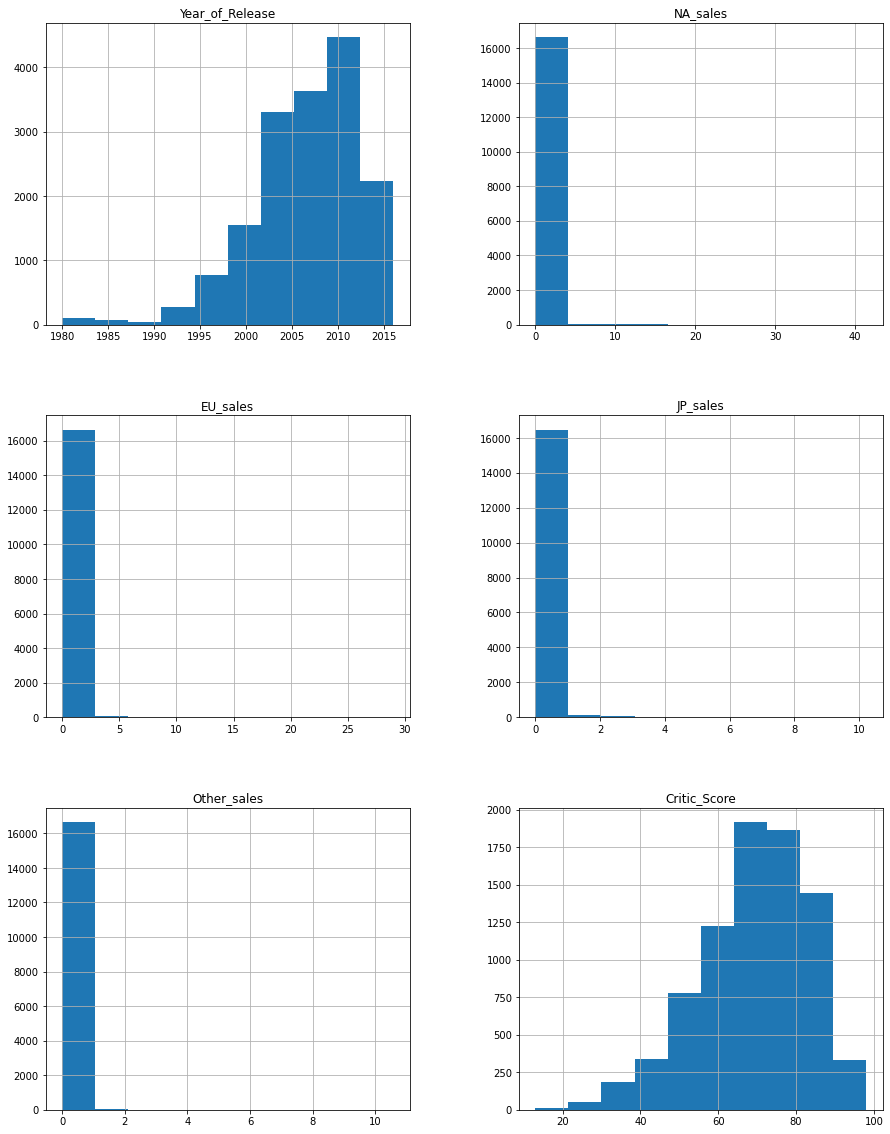

In [5]:
df.hist(figsize=(15,20));

In [6]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

<font color='6A5ACD'> 
    
### Итак, в данных нам представлены следующие параметры:
    
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Приступим к предобработке данных:
<font>

<font color='6A5ACD'> Для начала изменим названия столбцов, приведем их к нижнему регистру.

In [8]:
df.columns=df.columns.str.lower()

<font color='6A5ACD'>  Избавимся от пропусков в данных:

In [9]:
df=df.dropna(subset=['name', 'year_of_release'])

<font color='6A5ACD'> В данных столбцах совсем немного пропусков, да и заполнение их какими-либо значениями я считаю нецелесообразным и ненужным для анализа, потому я от них избавляюсь. Пропуски в остальных значениях я оставлю, так как для анализа мне важна точность, а синтетические данные ее подпортят.

<font color='6A5ACD'> Далее изменим типы данных на нужные нам для анализа:

In [10]:
df['year_of_release']=df['year_of_release'].astype('int')
df.loc[df['user_score']=='tbd', 'user_score']=np.nan
df['user_score']=df['user_score'].astype('float')
df['rating'] = df['rating'].fillna('no_rating')

<font color='6A5ACD'> Итак, я заменила тип данных для года (так как это всегда целое число) и для оценки пользователя, так как это тоже числа. Значение tbd я заменила на nan, чтобы возможно было построить графики и при этом качество данных не портилось. Отсутствие рейтингов я заменила "заглушкой", которая означает, что рейтинг еще не присвоен.

<font color='6A5ACD'> Добавим новый столбец с количеством продаж во всех регионах для каждой позиции

In [11]:
df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [12]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


<font color='6A5ACD'> 
    
Итак, на данном этапе я:

- Привела названия столбцов к нижнему регистру для упрощения работы с ними.
    
- Избавилась от пропусков в столбцах с годом выпуска и имени игры. Думаю, что их появление скорее связано с человеческим фактором, возможно, этой информации не было у человека, заполняющего данные, либо было допущено неправильное заполнение данных. Также вероятна техническая ошибка: потеря данных.
    
- Заполнять пропуски в других столбцах я считаю некорректным, так как данные мне нужны максимально точные для анализа, а также их достаточно много для удаления. В данном случае, я думаю, это скорее техническая ошибка.

- Изменила тип данных для некоторых столбцов для упрощения работы с ними.
    
- Добавила новый столбец с суммой продаж каждой позиции. <font>
    

<font color='6A5ACD'> 
 
Посмотрим, что у нас осталось после данного этапа:

In [13]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

<font color='6A5ACD'>
    
## Далее приступим к исследовательскому анализу данных:

(1980.0, 2016.0)

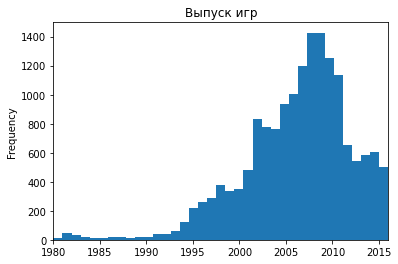

In [14]:
df['year_of_release'].plot(title='Выпуск игр', kind='hist', bins=37);
plt.xlim(1980,2016)

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


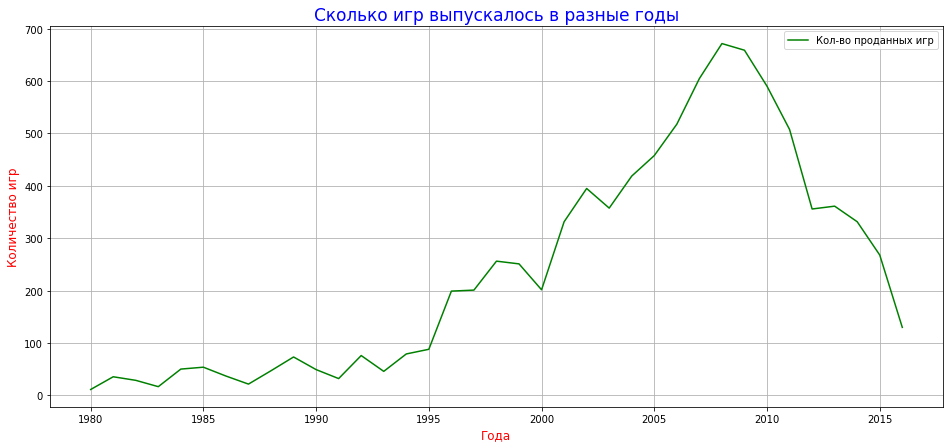

In [15]:
df_sum_games_years = df.groupby(['year_of_release']).agg({'name':'count'}).reset_index()
df_sale = (df.pivot_table(index='year_of_release', values='total_sales', aggfunc=('sum'))).reset_index()
display(df_sum_games_years.head())
plt.figure(figsize=(16, 7))
plt.plot(df_sale['year_of_release'], df_sale['total_sales'], '-g', label='steelad price');
plt.title('Cколько игр выпускалось в разные годы', fontsize=17, color='blue')
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Количество игр',fontsize=12, color='red')
plt.legend(['Кол-во проданных игр', 'Выпущено наименований'])
plt.grid(True)
plt.show()

<font color='6A5ACD'> Крайне маленький процент игр выпускался в период с 1980 до ~1994. Потому в рамках анализа мы не будем брать этот период для сравнения. Пик выпуска игр приходится на 2007-2011 год.

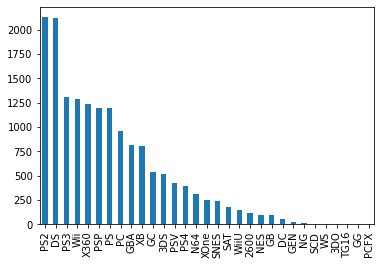

In [16]:
df['platform'].value_counts().plot(kind='bar');

<font color='6A5ACD'> Наибольшее количество игр выпускалось на платформах PS2 и DS. PS3, Wii, x360, PSP, PS примерно равноценно занимают второе место в этом списке. Платформа WS была наименее популярной в этой выборке. На платформах 3DO, TG16, GG, PCFX гистограмма вовсе близка к нулю.

<font color='6A5ACD'> Построим график продаж по платформам:

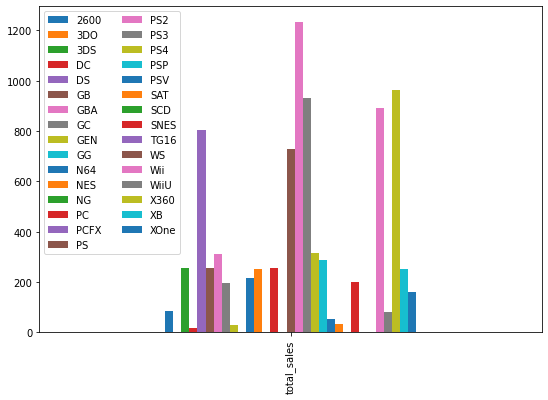

In [17]:

pd.pivot_table(df, columns='platform', values='total_sales', aggfunc=sum).plot(kind='bar', figsize=(9,6));
plt.legend(bbox_to_anchor=[0, 1], loc='upper left', ncol=2);

<font color='6A5ACD'> Из этого списка выберу наиболее продаваемые и составлю распределение по годам:

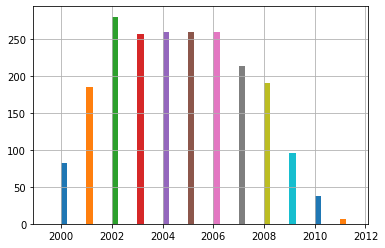

In [18]:
df.query('platform=="PS2"').groupby('year_of_release')['year_of_release'].hist(bins=4);

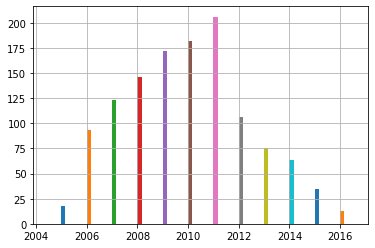

In [19]:
df.query('platform=="X360"').groupby('year_of_release')['year_of_release'].hist(bins=6);

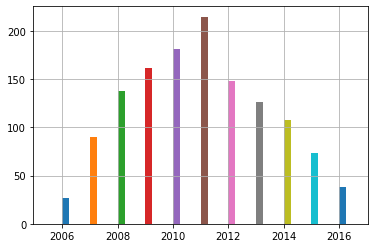

In [20]:
df.query('platform=="PS3"').groupby('year_of_release')['year_of_release'].hist(bins=4);

<font color='6A5ACD'>
    
### Изучив данные гистограммы, я пришла к выводу, что средний срок появления новой платформы и ее исчезновения=10 лет, а средний срок ее популярности-7 лет

<font color='6A5ACD'> Следующим шагом я возьму данные за соответствующий актуальный период. 

In [21]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

<font color='6A5ACD'> 
Как мне кажется, наиболее правильным будет взять данные за период 2012-2016 год, на это есть несколько причин:
    
- В этот период индустрия активно развивалась
    
- Этот период имеет приблизитетльно актуальные параметры, так как данные относительно новые. 

- На этот период приходится пик популярности топ-3 платформ из нашего списка 

Поместим данные с этим периодом в переменную df_act

In [22]:
df_act=df.query('2012<=year_of_release<=2016').reset_index(drop=True)

In [23]:
df_act.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
7,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
8,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
9,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


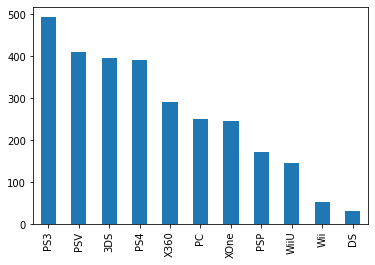

In [24]:
df_act['platform'].value_counts().plot(kind='bar');

In [25]:
df_act_platform = pd.pivot_table(df_act, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
display(df_act_platform.head())

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<font color='6A5ACD'> С помощью графика heatmap визуализируем распределение продаж по платформам

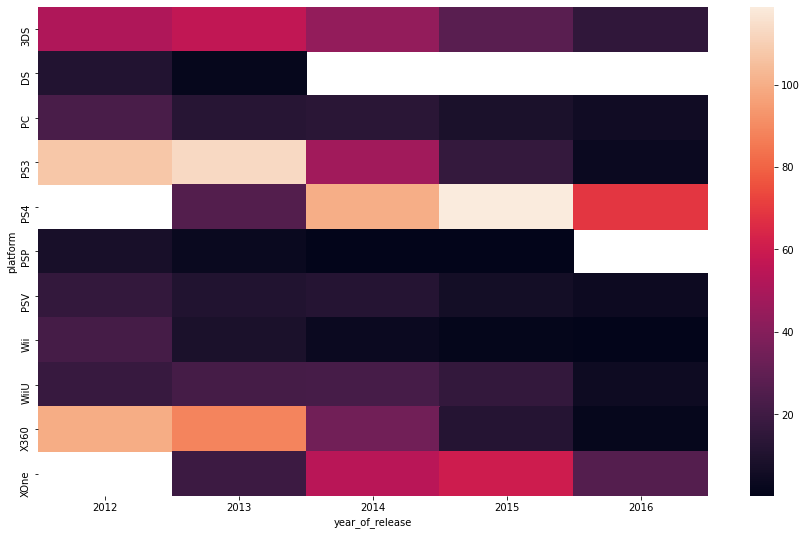

In [26]:
plt.figure(figsize=(15,9))
sns.heatmap(df_act_platform.T);

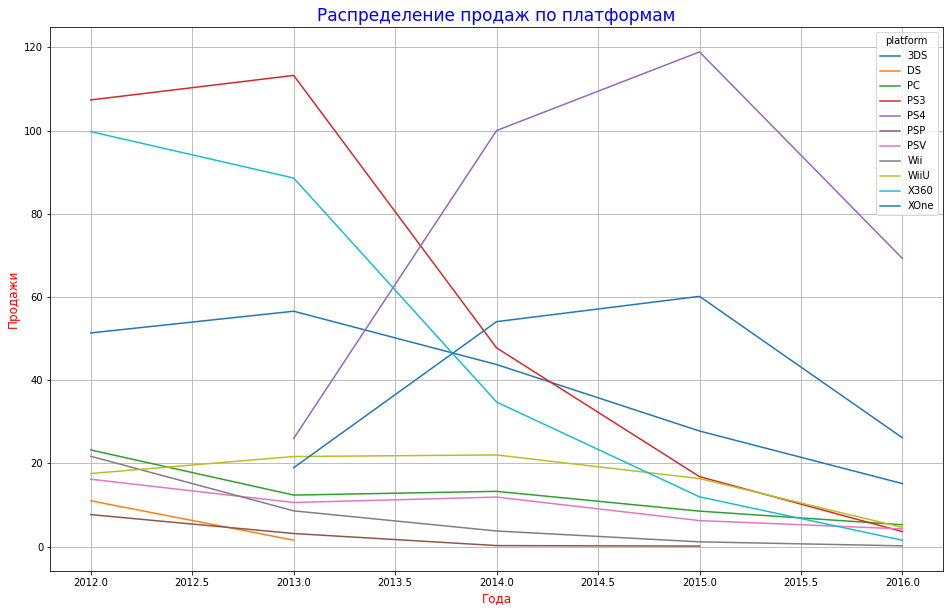

In [27]:
df_act_platform.plot(figsize=(16,10))
plt.grid(True)
plt.xlabel('Года',fontsize=12, color='red')
plt.ylabel('Продажи',fontsize=12, color='red')
plt.title('Распределение продаж по платформам', fontsize=17, color='blue')
plt.show()

In [28]:
df_act_platform_sales = pd.pivot_table(df_act, index='platform',values='total_sales', aggfunc='sum')
df_act_platform_sales.sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


<font color='6A5ACD'> Выберем 5 топовых платформ и сделаем гистограмму их роста по годам.

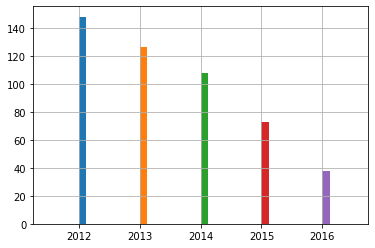

In [29]:
df_act.query('platform=="PS3"').groupby('year_of_release')['year_of_release'].hist(bins=8);

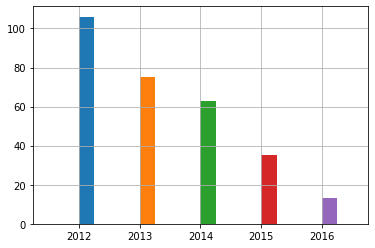

In [30]:
df_act.query('platform=="X360"').groupby('year_of_release')['year_of_release'].hist(bins=4);


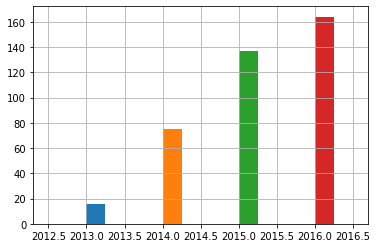

In [31]:
df_act.query('platform=="PS4"').groupby('year_of_release')['year_of_release'].hist(bins=4);

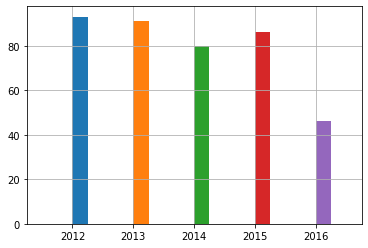

In [32]:
df_act.query('platform=="3DS"').groupby('year_of_release')['year_of_release'].hist(bins=4);

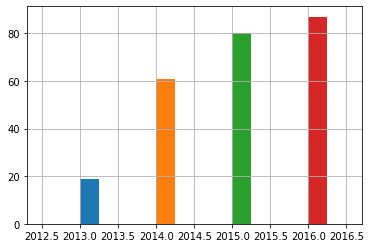

In [33]:
df_act.query('platform=="XOne"').groupby('year_of_release')['year_of_release'].hist(bins=4);

<font color='6A5ACD'> Я считаю, что можно также попробовать посмотреть на гистограмму трех наименее продаваемых платформ, чтобы увидеть, есть ли среди них только набирающие обороты платформы

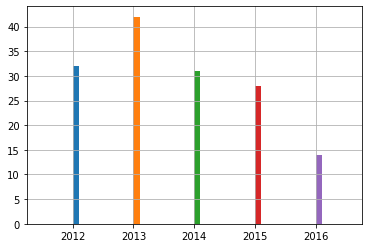

In [34]:
df_act.query('platform=="WiiU"').groupby('year_of_release')['year_of_release'].hist(bins=10);

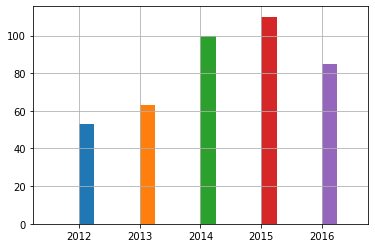

In [35]:
df_act.query('platform=="PSV"').groupby('year_of_release')['year_of_release'].hist(bins=4);

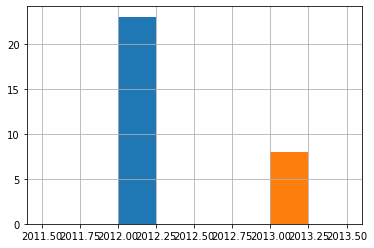

In [36]:
df_act.query('platform=="DS"').groupby('year_of_release')['year_of_release'].hist(bins=4);

<font color='6A5ACD'> 
    
### Итак, изучив данные, мы видим, что лидирует по продажам платформа PS4. Я хотела бы выделить платформу XOne, которая находится на пике популярности в 2015 году, и, зная примерные сроки популярности платформ, будет лидером +- 2014-2021, и PSV (+- 2011-2019), и, собственно, PS4 (2014-2021)

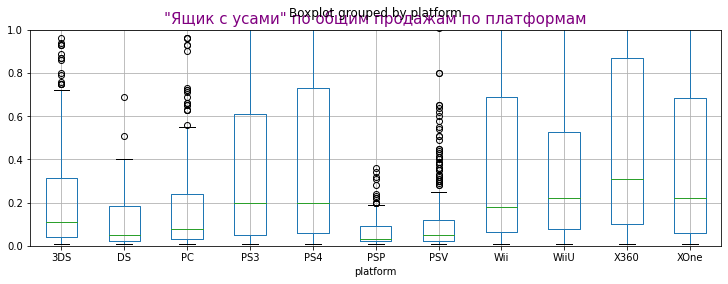

In [37]:
df_act.boxplot('total_sales', by = 'platform', figsize=(12,4));
plt.title('"Ящик с усами" по общим продажам по платформам', fontsize=15, color='purple')
plt.ylim(0,1);

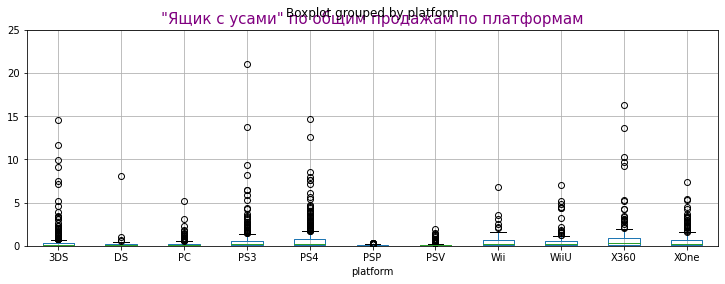

In [38]:
df_act.boxplot('total_sales', by = 'platform', figsize=(12,4));
plt.title('"Ящик с усами" по общим продажам по платформам', fontsize=15, color='purple')
plt.ylim(0,25);

<font color='6A5ACD'> 

### По данным графикам я могу сделать следующие выводы:
* Для всех платформ (кроме, разве что, PS2) значения в основном выше медианы. Разница между средним значением и медианой указывает на то что существует несколько позиций с экстремальными значениями.
* Разница в средних продажах тоже большая
* "Усы" первой тройки платформ в разы больше "усов" менее популярных платформ.
* Имеется несколько выбросов для некоторых платформ

<font color='6A5ACD'>  Чтобы посмотреть зависимость общих продаж от оценки пользователей и критиков, я решила взять самую популярную платформу- PS4.

In [40]:
df_PS4=df_act.query('platform=="PS4"')

In [41]:
df_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
14,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
17,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
18,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [42]:
df_PS4_scatter_matrix =df_PS4[['total_sales', 'critic_score', 'user_score']]
df_PS4_scatter_matrix.head()

,total_sales,critic_score,user_score
2,14.63,NaN,NaN
6,12.62,97.0,8.3
14,8.58,82.0,4.3
17,7.98,NaN,NaN
18,7.66,83.0,5.7


In [43]:
print('Платформа PS4')
print(df_PS4_scatter_matrix.corr())

Платформа PS4
              total_sales  critic_score  user_score
total_sales      1.000000      0.406568   -0.031957
critic_score     0.406568      1.000000    0.557654
user_score      -0.031957      0.557654    1.000000


<font color='6A5ACD'>  Рассмотрим поближе каждый график

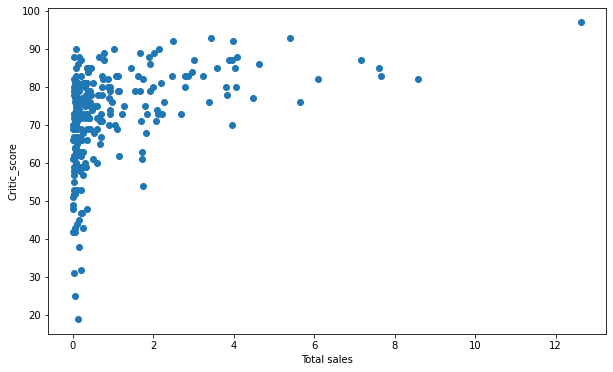

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_PS4['total_sales'], y = df_PS4['critic_score'])
plt.xlabel("Total sales")
plt.ylabel("Critic_score");

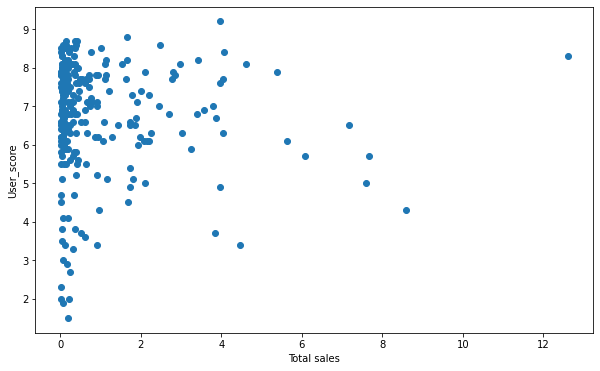

In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_PS4['total_sales'], y = df_PS4['user_score'])
plt.xlabel("Total sales")
plt.ylabel("User_score");

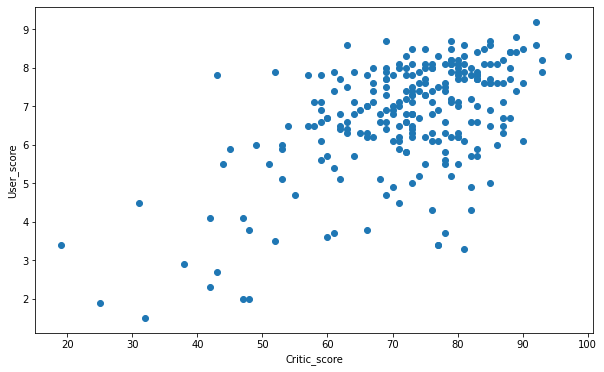

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_PS4['critic_score'], y = df_PS4['user_score'])
plt.xlabel("Critic_score")
plt.ylabel("User_score");

<font color='6A5ACD'> 
    
### Итак, я могу сделать следующие выводы, исходя из графиков корреляции:
    
- Присутствует слабая положительная зависимость продаж от оценки критиков. То есть при увеличении одного показателя, увеличивается второй
 
- Присутствует крайне слабая отрицательная зависимость продаж от оценки пользователей. То есть при увеличении одного показателя, уменьшается второй.
    
- Присутствует слабая положительная зависимость оценки пользователей и оценки критиков.То есть при увеличении одного показателя, увеличивается второй
    

<font color='6A5ACD'> 
    
### Сравним данные с продажами других игр

<font color='6A5ACD'>  Возьмем еще несколько плафторм для анализа: X360, PS3, 3DS, XOne, PC	

In [47]:
df_X360=df_act.query('platform=="X360"')
df_PS3=df_act.query('platform=="PS3"')
df_3DS=df_act.query('platform=="3DS"')
df_Xone=df_act.query('platform=="XOne"')
df_PC=df_act.query('platform=="PC"')

In [48]:
df_X360_scatter_matrix =df_X360[['total_sales', 'critic_score', 'user_score']]
df_PS3_scatter_matrix =df_PS3[['total_sales', 'critic_score', 'user_score']]
df_3DS_scatter_matrix =df_3DS[['total_sales', 'critic_score', 'user_score']]
df_Xone_scatter_matrix =df_Xone[['total_sales', 'critic_score', 'user_score']]
df_PC_scatter_matrix =df_PC[['total_sales', 'critic_score', 'user_score']]


In [49]:
print('Платформа X360')
print(df_X360_scatter_matrix.corr())

Платформа X360
              total_sales  critic_score  user_score
total_sales      1.000000      0.360573    0.006164
critic_score     0.360573      1.000000    0.557352
user_score       0.006164      0.557352    1.000000


Платформа X360


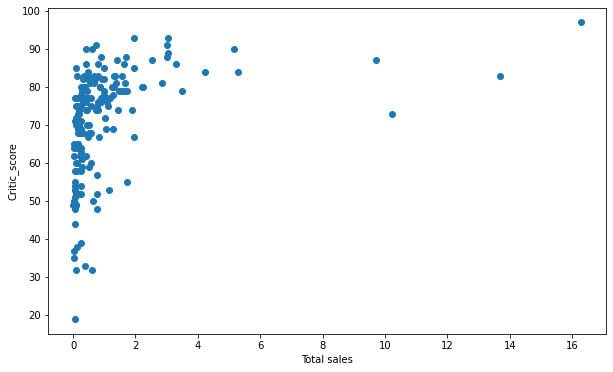

In [50]:
print('Платформа X360')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_X360['total_sales'], y = df_X360['critic_score'])
plt.xlabel("Total sales")
plt.ylabel("Critic_score");

Платформа X360


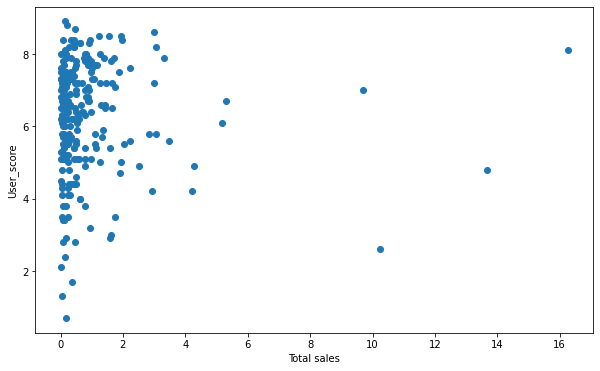

In [51]:
print('Платформа X360')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_X360['total_sales'], y = df_X360['user_score'])
plt.xlabel("Total sales")
plt.ylabel("User_score");

Платформа X360


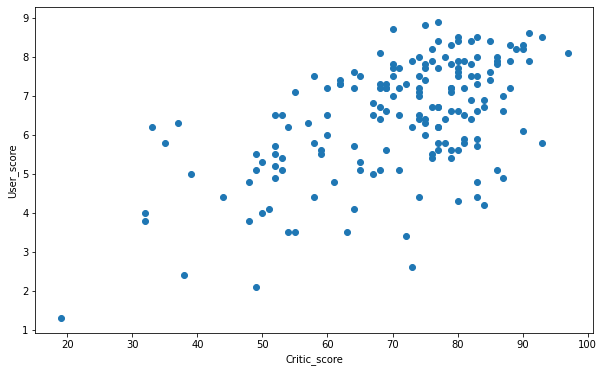

In [52]:
print('Платформа X360')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_X360['critic_score'], y = df_X360['user_score'])
plt.xlabel("Critic_score")
plt.ylabel("User_score");

In [53]:
print('Платформа PS3')
print(df_PS3_scatter_matrix.corr())

Платформа PS3
              total_sales  critic_score  user_score
total_sales      1.000000      0.331497   -0.005144
critic_score     0.331497      1.000000    0.539456
user_score      -0.005144      0.539456    1.000000


Платформа PS3


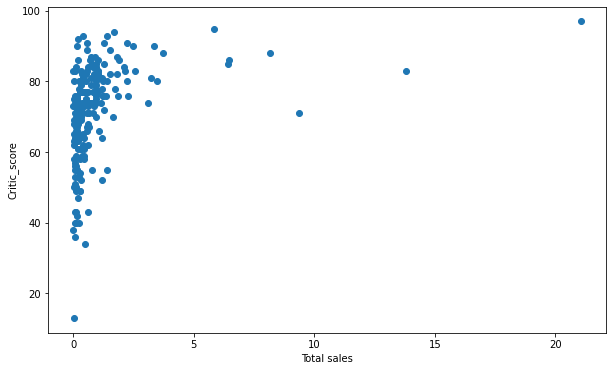

In [54]:
print('Платформа PS3')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_PS3['total_sales'], y = df_PS3['critic_score'])
plt.xlabel("Total sales")
plt.ylabel("Critic_score");

Платформа PS3


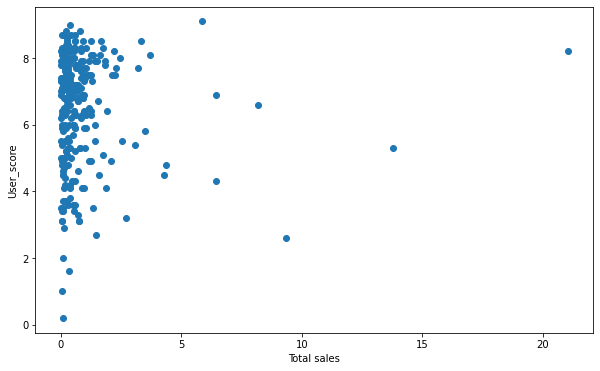

In [55]:
print('Платформа PS3')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_PS3['total_sales'], y = df_PS3['user_score'])
plt.xlabel("Total sales")
plt.ylabel("User_score");

Платформа PS3


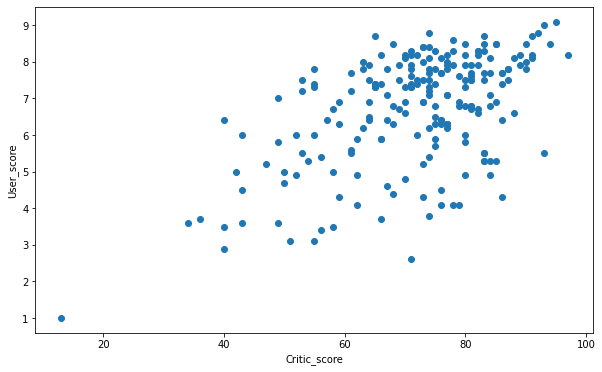

In [56]:
print('Платформа PS3')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_PS3['critic_score'], y = df_PS3['user_score'])
plt.xlabel("Critic_score")
plt.ylabel("User_score");

In [57]:
print('Платформа 3DS')
print(df_3DS_scatter_matrix.corr())

Платформа 3DS
              total_sales  critic_score  user_score
total_sales      1.000000      0.320803    0.197583
critic_score     0.320803      1.000000    0.722762
user_score       0.197583      0.722762    1.000000


Платформа 3DS


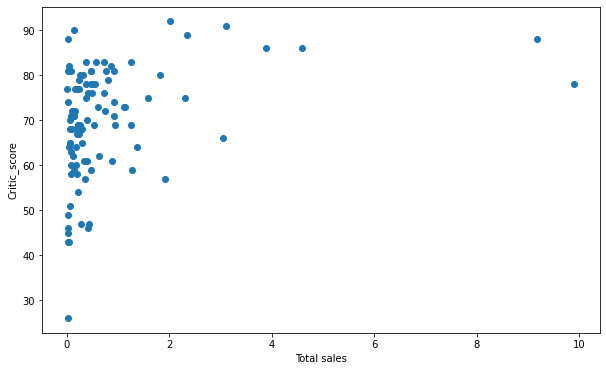

In [58]:
print('Платформа 3DS')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_3DS['total_sales'], y = df_3DS['critic_score'])
plt.xlabel("Total sales")
plt.ylabel("Critic_score");

Платформа 3DS


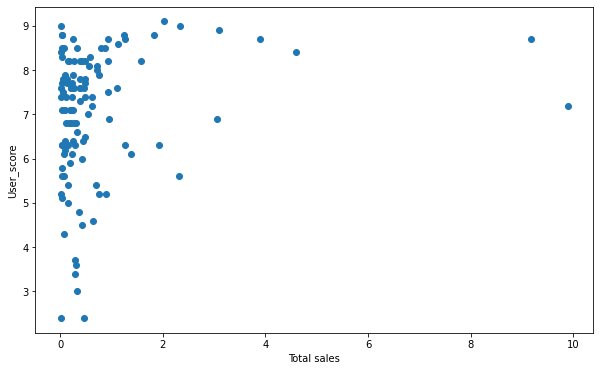

In [59]:
print('Платформа 3DS')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_3DS['total_sales'], y = df_3DS['user_score'])
plt.xlabel("Total sales")
plt.ylabel("User_score");

Платформа 3DS


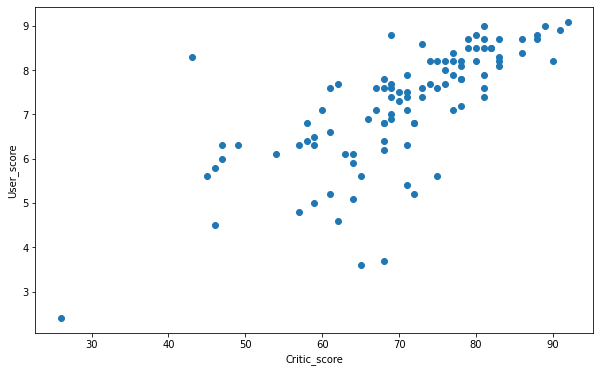

In [60]:
print('Платформа 3DS')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_3DS['critic_score'], y = df_3DS['user_score'])
plt.xlabel("Critic_score")
plt.ylabel("User_score");

In [61]:
print('Платформа XOne')
print(df_Xone_scatter_matrix.corr())

Платформа XOne
              total_sales  critic_score  user_score
total_sales      1.000000      0.416998   -0.068925
critic_score     0.416998      1.000000    0.472462
user_score      -0.068925      0.472462    1.000000


Платформа XOne


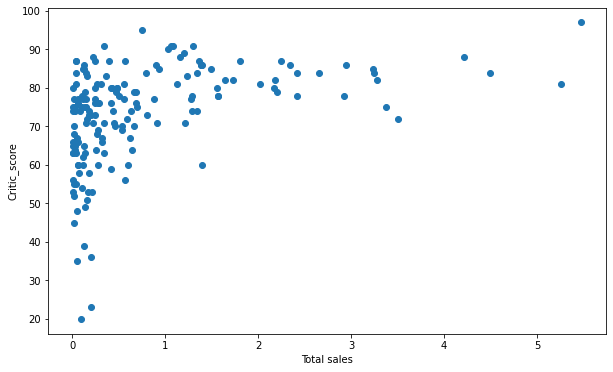

In [62]:
print('Платформа XOne')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_Xone['total_sales'], y = df_Xone['critic_score'])
plt.xlabel("Total sales")
plt.ylabel("Critic_score");

Платформа XOne


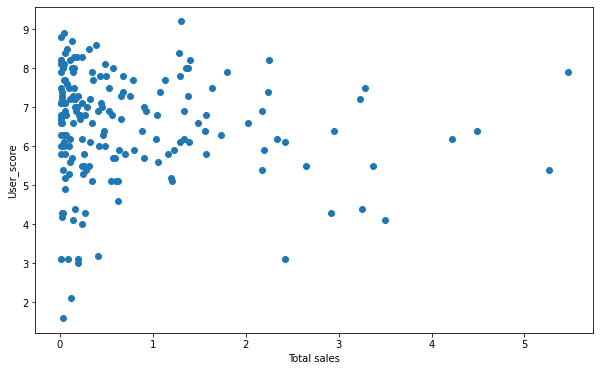

In [63]:
print('Платформа XOne')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_Xone['total_sales'], y = df_Xone['user_score'])
plt.xlabel("Total sales")
plt.ylabel("User_score");

Платформа XOne


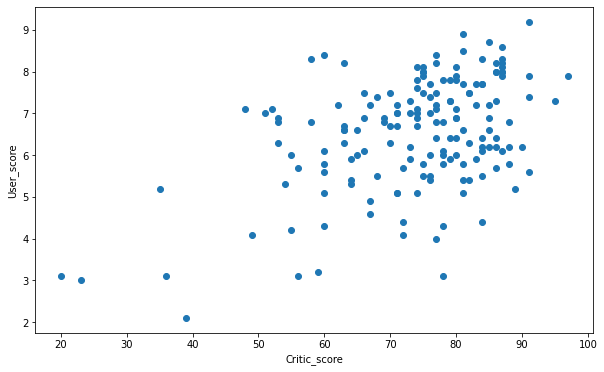

In [64]:
print('Платформа XOne')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_Xone['critic_score'], y = df_Xone['user_score'])
plt.xlabel("Critic_score")
plt.ylabel("User_score");

In [65]:
print('Платформа PC')
print(df_PC_scatter_matrix.corr())

Платформа PC
              total_sales  critic_score  user_score
total_sales      1.000000      0.237243   -0.121867
critic_score     0.237243      1.000000    0.432587
user_score      -0.121867      0.432587    1.000000


Платформа PC


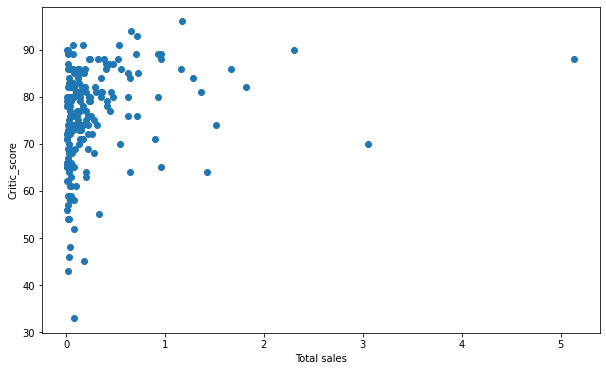

In [66]:
print('Платформа PC')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_PC['total_sales'], y = df_PC['critic_score'])
plt.xlabel("Total sales")
plt.ylabel("Critic_score");

Платформа PC


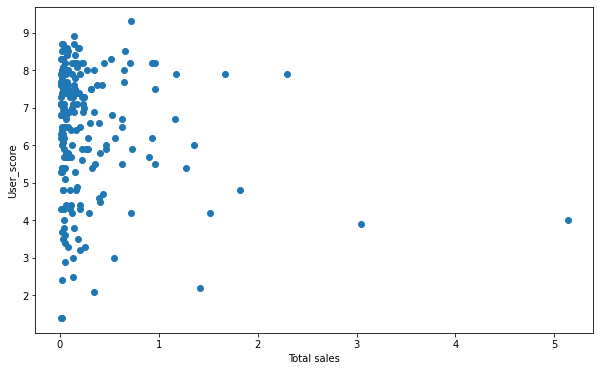

In [67]:
print('Платформа PC')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_PC['total_sales'], y = df_PC['user_score'])
plt.xlabel("Total sales")
plt.ylabel("User_score");

Платформа PC


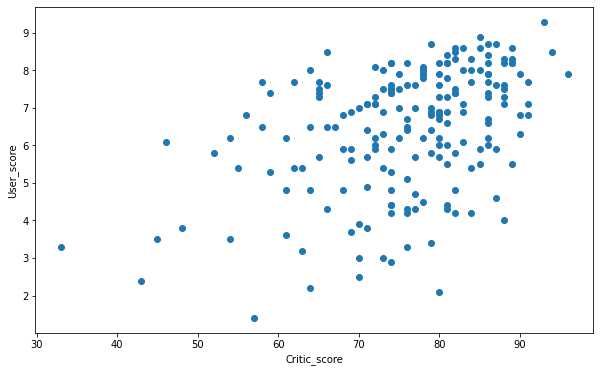

In [68]:
print('Платформа PC')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_PC['critic_score'], y = df_PC['user_score'])
plt.xlabel("Critic_score")
plt.ylabel("User_score");

<font color='6A5ACD'>

### Итак, я могу сделать следующие выводы, исходя из графиков корреляции:
    
- Так же, как и в случае с PS4, присутствует слабая (правда, в два раза слабее) положительная зависимость продаж от оценки критиков. То есть при увеличении одного показателя, увеличивается второй.
 
- Присутствует крайне слабая положительная зависимость продаж от оценки пользователей. То есть при увеличении одного показателя, увеличивается второй. (У некоторых платформ, как у платформы PS4, прослеживается слабая отрицательная зависимость общих продаж от оценки пользователей. Это платформы PC, XOne. То есть в данных случаях при увеличении значений одного показателя, значения другого показателя уменьшаются)
    
- И так же, как и в случае с PS4, присутствует слабая положительная зависимость оценки пользователей и оценки критиков.То есть при увеличении одного показателя, увеличивается второй
 
    
В среднем ситуация аналогична PS4.

<font color='6A5ACD'> 

### Далее рассмотрим общее распределение игр по жанрам

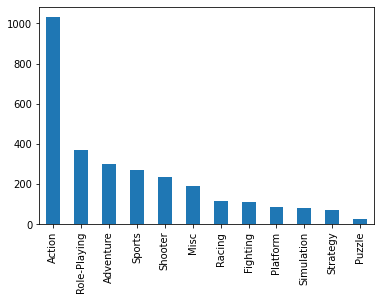

In [69]:
df_act['genre'].value_counts().plot(kind='bar');

<font color='6A5ACD'> Большее количество игр в жанре экшн, наименьшее же количество игр в жанре пазл.

In [70]:
df_genre = (df_act.groupby(['genre']).agg({'total_sales':'sum', 'name':'count'})
                   .sort_values(by='total_sales', ascending=False))
df_genre = df_genre.reset_index()
display(df_genre)

,genre,total_sales,name
0,Action,441.12,1031
1,Shooter,304.73,235
2,Role-Playing,192.80,370
3,Sports,181.07,268
4,Misc,85.04,192
5,Platform,61.00,85
6,Racing,53.50,115
7,Fighting,44.49,109
8,Simulation,35.12,80
9,Adventure,29.43,302


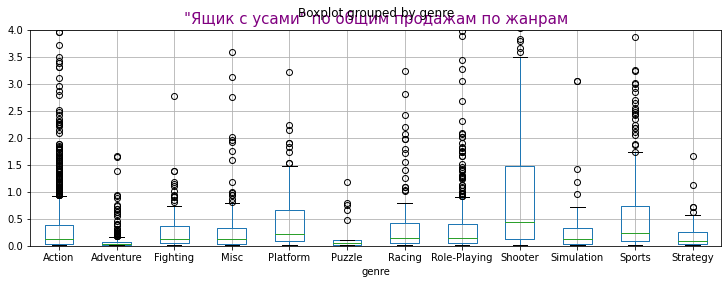

In [71]:
df_act.boxplot('total_sales', by = 'genre', figsize=(12,4));
plt.title('"Ящик с усами" по общим продажам по жанрам', fontsize=15, color='purple')
plt.ylim(0,4);

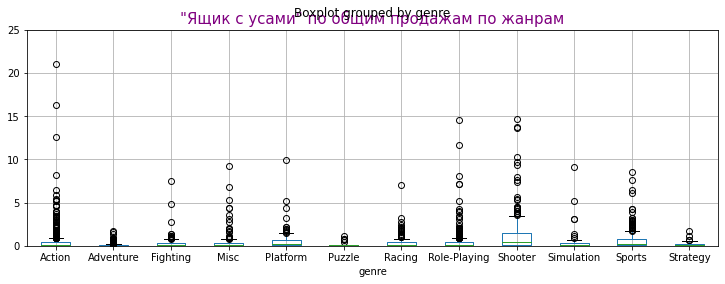

In [72]:
df_act.boxplot('total_sales', by = 'genre', figsize=(12,4));
plt.title('"Ящик с усами" по общим продажам по жанрам', fontsize=15, color='purple')
plt.ylim(0,25);

<font color='6A5ACD'> 
    
### Эта таблица нам позволяет сделать следующие выводы:
    
    
- Усы жанров shooter и platform значительно длинее усов других жанров, что говорит о том, что максимальные значения у них выше.
   
- При этом "усы" жанра action, в котором наиболее часто делают игры, довольно короткие, что говорит, что продажи в этом жанре средние.
    
- В принципе довольно популярные для создателей игр жанры не пользуются преимуществом. 
    
    
Стоит обратить внимание на жанр platform

<font color='6A5ACD'> 
    
## Вывод этого этапа.
    
   
### Итак, в данном этапе мне удалось сделать следующее:
 
- Определить платформы-лидеров по продажам, проанализировать длительность их популярности и на ее основе сделать вывод средней продолжительности "жизни" платформы.
   
- Определить актуальный период, на основе которого и проводился дальнейший анализ.
    
- Определить платформы-лидеров по продажам в актуальный период, проанализировала их рост по годам и выявить три перспективные для работы платформы (XOne, PSV и PS4)
    
- Определить зависимость продаж от оценки пользователей и критиков для наиболее популярной платформы и для нескольких менее популярных платформ
    
- Рассмотрела общее распределение игр по жанрам, определила жанры, в которых наиболее часто выпускаются игры, и сравнила их с наиболее продаваемыми жанрами. Определила жанры с наибольшими и наименьшими общими продажами

<font color='6A5ACD'> 
  
    
## Следующим этапом составим "портрет" пользователя каждого региона

<font color='6A5ACD'> 
    
### Для начала определим самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)

In [73]:
df_user_na_platform = df_act.groupby(['platform']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print('ТОП-5 Северной Америки')
df_user_na_platform

ТОП-5 Северной Америки


,platform,na_sales
9,X360,140.05
4,PS4,108.74
3,PS3,103.38
10,XOne,93.12
0,3DS,55.31


In [74]:
df_user_eu_platform = df_act.groupby(['platform']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print('ТОП-5 Европы')
df_user_eu_platform

ТОП-5 Европы


,platform,eu_sales
4,PS4,141.09
3,PS3,106.86
9,X360,74.52
10,XOne,51.59
0,3DS,42.64


In [75]:
df_user_jp_platform = df_act.groupby(['platform']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print('ТОП-5 Япония')
df_user_jp_platform

ТОП-5 Япония


,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


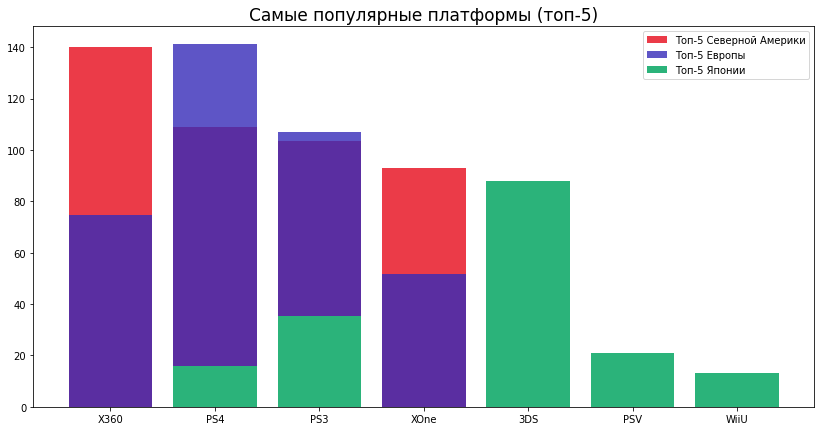

In [76]:
plt.figure(figsize=(14, 7))
plt.bar(df_user_na_platform['platform'], df_user_na_platform['na_sales'], color=(0.9, 0.04, 0.1, 0.8))
plt.bar(df_user_eu_platform['platform'], df_user_eu_platform['eu_sales'], color=(0.21, 0.17, 0.72, 0.8))
plt.bar(df_user_jp_platform['platform'], df_user_jp_platform['jp_sales'], color=(0.17, 0.7, 0.48, 1))
plt.title('Самые популярные платформы (топ-5)', fontsize=17, color='black')
plt.legend([ 'Топ-5 Северной Америки', 'Топ-5 Европы', 'Топ-5 Японии'])
plt.show()

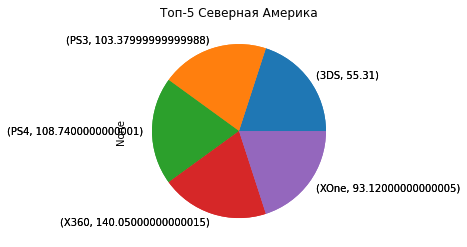

In [77]:
df_user_na_platform.value_counts().plot(kind='pie', y='[platform]', title='Топ-5 Северная Америка');
df_user_na_platform.value_counts().plot(kind='pie', y='[platform]', title='Топ-5 Северная Америка');

<font color='6A5ACD'>  
    
Мы видим значительную разницу в продажах в каждом регионе:
    
- Доля продаж самой популярной платформы в странах Северной Америки равна 595.05, в то время как доля продаж самой популярной платформы в Японии равна 175, что значительно меньше. Продажи каждой позиции в Северной Америке значительно больше продаж каждой позиции в Японии или в Европе.

In [78]:
df_user_na_genre = df_act.groupby(['genre']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print('ТОП-5 Северной Америки жанры')
df_user_na_genre

ТОП-5 Северной Америки жанры


,genre,na_sales
0,Action,177.84
8,Shooter,144.77
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


In [79]:
df_user_eu_genre = df_act.groupby(['genre']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print('ТОП-5 Европы жанры')
df_user_eu_genre

ТОП-5 Европы жанры


,genre,eu_sales
0,Action,159.34
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


In [80]:
df_user_jp_genre = df_act.groupby(['genre']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print('ТОП-5 Японии жанры')
df_user_jp_genre


ТОП-5 Японии жанры


,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,12.86
9,Simulation,10.41
2,Fighting,9.44


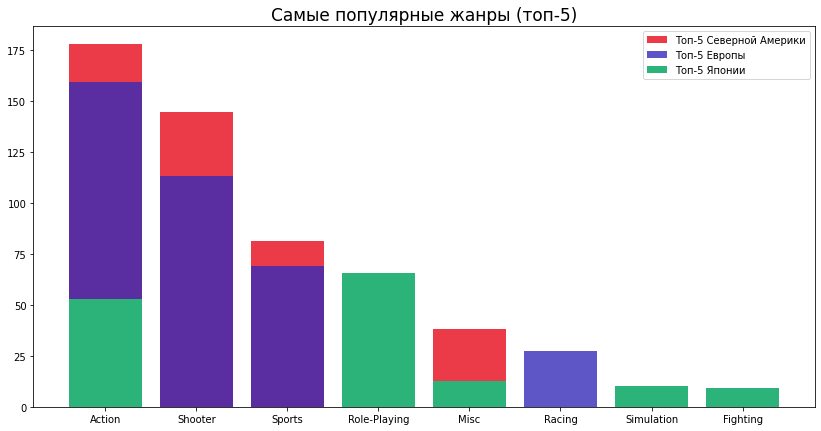

In [81]:
plt.figure(figsize=(14, 7))
plt.bar(df_user_na_genre['genre'], df_user_na_genre['na_sales'], color=(0.9, 0.04, 0.1, 0.8))
plt.bar(df_user_eu_genre['genre'], df_user_eu_genre['eu_sales'], color=(0.21, 0.17, 0.72, 0.8))
plt.bar(df_user_jp_genre['genre'], df_user_jp_genre['jp_sales'], color=(0.17, 0.7, 0.48, 1))
plt.title('Самые популярные жанры (топ-5)', fontsize=17, color='black')
plt.legend([ 'Топ-5 Северной Америки', 'Топ-5 Европы', 'Топ-5 Японии'])
plt.show()

<font color='6A5ACD'>  Что касается жанров, популярные жанры в Европе и в Северной Америке почти одинаковы (за исключением последней позиции), но популярные жанры в Японии значительно отличаются. Среднестатистический любитель видеоигр в Японии предпочтет Role-Playing играм жанра Action, misc и sports. В то время как жители Северной Америки и Европы скорее выберут action. Думаю, это связано с культурой игр на Востоке- вместо обычных игр типа shooter, они предпочтут rp, в которых есть сюжет и что-то глубже.

<font color='6A5ACD'>  
    
### Далее рассмотрим влияние рейтинга ESRB на продажи в отдельном регионе.

<font color='6A5ACD'> 
    
Для общего понимания сначала обозначим, что такое рейтинг ESRB и какие позиции в нем есть
    
- EC	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. 
    
    
- E	Подходит для всех возрастных категорий. 
    
    
- E 10+	Подходит для лиц старше 10 лет. 
    
    
- T	Подходит для лиц старше 13 лет. 
    
    
- M	Подходит для лиц старше 17 лет. 
    
    
- AO	Подходит для взрослых старше 18 лет. 
    
    
- RP	Категория ещё не присвоена.
    
  
- K-A- то же, что и Е до 1998 

<font color='6A5ACD'>  Теперь рассчитаем топ рейтинги в проданных играх для каждого региона:
 

In [82]:
df_user_na_rating = df_act.groupby(['rating']).agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5)
print('ТОП-5 Северной Америки рейтинг')
df_user_na_rating

ТОП-5 Северной Америки рейтинг


,rating,na_sales
2,M,231.57
0,E,114.37
4,no_rating,103.31
1,E10+,75.70
3,T,66.02


In [83]:
df_user_eu_rating = df_act.groupby(['rating']).agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5)
print('ТОП-5 Европы рейтинг')
df_user_eu_rating

ТОП-5 Европы рейтинг


,rating,eu_sales
2,M,193.96
0,E,113.03
4,no_rating,91.50
1,E10+,55.37
3,T,52.96


In [84]:
df_user_jp_rating = df_act.groupby(['rating']).agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5)
print('ТОП-5 Японии рейтинг')
df_user_jp_rating

ТОП-5 Японии рейтинг


,rating,jp_sales
4,no_rating,108.84
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


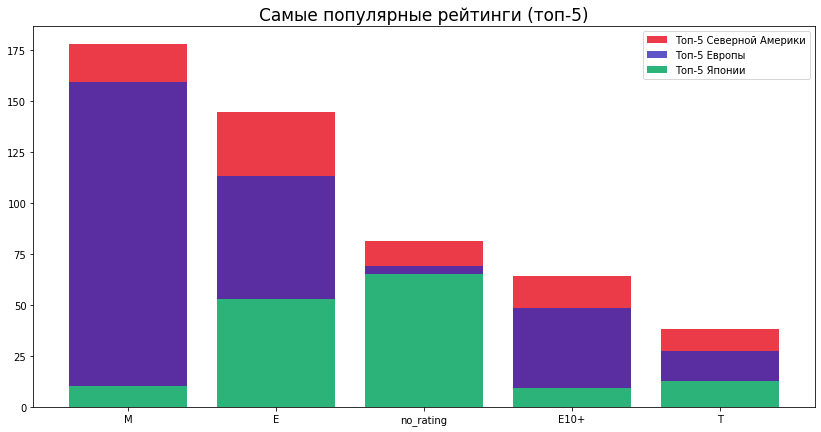

In [85]:
plt.figure(figsize=(14, 7))
plt.bar(df_user_na_rating['rating'], df_user_na_genre['na_sales'], color=(0.9, 0.04, 0.1, 0.8))
plt.bar(df_user_eu_rating['rating'], df_user_eu_genre['eu_sales'], color=(0.21, 0.17, 0.72, 0.8))
plt.bar(df_user_jp_rating['rating'], df_user_jp_genre['jp_sales'], color=(0.17, 0.7, 0.48, 1))
plt.title('Самые популярные рейтинги (топ-5)', fontsize=17, color='black')
plt.legend([ 'Топ-5 Северной Америки', 'Топ-5 Европы', 'Топ-5 Японии'])
plt.show()

<font color='6A5ACD'> 
    
### Итак, какой вывод мы можем сделать по данным:
    
Наиболее популярные рейтинги во всех регионах: E, T, M, E10+. При анализе рейтингов можно сказать, что в каждом отдельном регионе рейтинг ESRB на продажи практически не влияет. Также стоит отметить, что в каждом регионе среди топ-рейтингов есть значение no_rating, что, если верить интернету, означает, что данной игре еще не успели присвоить какой-либо рейтинг. (Не отрицаем вероятность какого-то % потерянных данных), либо что данная игра была выпущена не в странах Северной Америки. Вывод этот подтверждает no_rating во главе рейтинга в Японии- значит преимущество имеют игры, выпущенные не в Северо-Американском регионе. 

<font color='6A5ACD'>
    
    
## Вывод данного этапа.
    
### На данном этапе мне удалось:
    
- Определить топ-5 платформ для какдого региона и сравнить доли продаж игр для этих платформ.
    
- Определить топ-5 жанр для каждого региона и сравнить их.
    
- Определить влияние ESRB рейтингов на продажи в отдельном регионе.
    
Так, на этом этапе выделились следующие платформы:
    
X360 для Северной Америки, PS3 для Европы, DS для Японии.
    
Следующие жанры:
    
    
Action для Европы и СА, Role-playing для Японии.
    
    
Следующие рейтинги для всех регионов: 
    

E, T, M, E10+
    
Топовой позицией в Японии является no_rating, что означает, что игры выпущены не в странах Северной Америки.
    
<font color='6A5ACD'>

При анализе рейтингов можно сказать, что в каждом отдельном регионе рейтинг ESRB на продажи практически не влияет.

<font color='6A5ACD'> 
    
## Следующим шагом мы проверим некоторые гипотезы.

<font color='6A5ACD'> 

## Первая гипотеза звучит следующим образом:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [86]:
print("Средние пользовательские рейтинги платформы Xbox One=", round(df_act.query('platform=="XOne"')['user_score'].mean(),2))
print("Средние пользовательские рейтинги платформы PC=", round(df_act.query('platform=="PC"')['user_score'].mean(),2))


Средние пользовательские рейтинги платформы Xbox One= 6.52
Средние пользовательские рейтинги платформы PC= 6.43


<font color='6A5ACD'> 
    
Так как наша задача проверить равенство рейтингов двух платформ,  без указания "меньше"/"больше",
    
Нулевой гипотезой будет следующая:
    
    
"Средние пользовательские рейтинги платформ Xbox One и PC равны"
    
    
Альтернативной гипотезой будет:
    
    
    
"Средние пользовательские рейтинги платформы Xbox One и PC не равны"

<font color='6A5ACD'> 
    
Поскольку я не удаляла Nan из df, создам новый, где обозначу, что рейтинги должны быть больше или равны нулю, чтобы результаты были максимально точными.

In [87]:
df_act_clear=df_act.query('user_score>=0')

In [88]:
alpha= .05 # Обозначаем критический уровень статистической значимости

results=st.ttest_ind(df_act_clear.query('platform=="XOne"')['user_score'],df_act_clear.query('platform=="PC"')['user_score'])
print('p-значение', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


<font color='6A5ACD'>  Таким образом, мы не можем отвергнуть гипотезу о том, что средние пользовательские рейтинги этих двух платформ равны. 

<font color='6A5ACD'> 
  
Следующая гипотеза звучит так:
"Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные."

In [89]:
print("Средние пользовательские рейтинги жанра action =", round(df_act.query('genre=="Action"')['user_score'].mean(),2))
print("Средние пользовательские рейтинги жанра sports=", round(df_act.query('genre=="Sports"')['user_score'].mean(),2))

Средние пользовательские рейтинги жанра action = 6.83
Средние пользовательские рейтинги жанра sports= 5.46


<font color='6A5ACD'>  
    
Как и в ситуации с предыдущей гипотезой, мы лишь проверяем равенство, потому нулевая гипотеза будет звучать так:
    
    
Средние пользовательские рейтинги жанров action и sports равны
    
    
А альтернативная:

    
Средние пользовательские рейтинги жанров action и sports неравны

In [90]:
alpha= .05 # Обозначаем критический уровень статистической значимости

results=st.ttest_ind(df_act_clear.query('genre=="Action"')['user_score'],df_act_clear.query('genre=="Sports"')['user_score'])
print('p-значение', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение 3.7163089460934874e-26
Отвергаем нулевую гипотезу


<font color='6A5ACD'>  На основе имеющихся данных (при критическом уровне статистической значимости) есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтинигов жанров action и sports в пользу альтернативной гипотезы


<font color='6A5ACD'> 

## Вывод этого этапа:
    
У нас были две гипотезы:
    
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
    
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
    
Так как в данном случае мы проверяли лишь равенство двух значений без обозначений "больше-меньше", нулевая и альтернативная гипотеза звучали так:
    
    
1) "Средние пользовательские рейтинги платформ Xbox One и PC равны"
  
    
    
"Средние пользовательские рейтинги платформы Xbox One и PC не равны"

    
2) "Средние пользовательские рейтинги жанров action и sports равны"
    

"Средние пользовательские рейтинги жанров action и sports не равны"
    
    
Для проверки гипотез я использовала двусторонний t-test, так как мы проверяли равенство двух значений.
    
    
По результатам исследования, первую гипотезу опровергнуть нельзя, то есть средние пользовательские рейтинги (user_score) Xbox One и PC равны.
    
Вторую гипотезу опровергнуть не получилось, что значит, что средние пользовательские рейтинги (user_score) не равны.

<font color='6A5ACD'>

# Общий вывод.
    
### Результаты исследования:
    
 
В рамках данного исследования мною были проанализированы данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
    
    
Исследование проходило в несколько этапов и я сделала следующие шаги и получила следующие выводы:
    
- Изучила данные и информацию о них, необходимую для анализа
    
 
- Сделала предобработку данных для удобного и корректного их использования (избавилась от пропусков, заполнила пропуски значениями-заглушками, чтобы не портить качество данных)
    

- Добавила необходимый для анализа столбец с суммой всех продаж для каждой позиции
    
    
## Выполнила исследовательский анализ данных, в рамках которого установила, что:
    
- Крайне маленький процент игр выпускался в период с 1980 до ~1994
    
- Пик выпуска игр приходится на 2007-2011 год.
    
- Наибольшее количество игр выпускалось на платформах PS2 и DS.
    
- Наименьшее количество игр выпускалось на платформах 3DO, TG16, GG, PCFX выпускалось крайне маленькое количество игр
    
А также: 
    
- Определила средний срок появления новой платформы и ее исчезновения (10 лет) и средний срок пика ее популярности-7 лет
    
- Определила актуальный период (2004, 2015 год) и на основе этого периода выполняла дальнейший анализ
    
- Визуализировала распределение продаж по плафтормам и определила рост топовых по годам
    
- Установила, что лидирует по продажам платформа X360.(также выделила ps3, wii, ds, ps4, 3ds)

- Выделила как рекомендацию платформы XOne, которая находится на пике популярности в 2015 году, и, зная примерные сроки популярности платформ, будет лидером +- 2014-2021), и PSV (+- 2011-2019) и PS4 (2014-2021)
    
- Визуализировала распределение медианы и значений игр по платформам
    
- Определила зависимость количества продаж от оценки пользователей и критиков для наиболее популярной платформы и сравнила выводы с остальными играми. Они совпали и звучали следующим образом:
  
* Присутствует слабая положительная зависимость продаж от оценки критиков. То есть при увеличении одного показателя, увеличивается второй
 
* Присутствует крайне слабая положительная зависимость продаж от оценки пользователей. То есть при увеличении одного показателя, уменьшается второй.
    
* Присутствует слабая положительная зависимость оценки пользователей и оценки критиков.То есть при увеличении одного показателя, увеличивается второй
    
    Проанализировала распределение игр по жанрам и их продаваемость и сделала следующие выводы: 
    
    
- Жанры shooter и platform выделяются среди остальных по количеству продаж
  
- У платформы action количество продаж среднее, несмотря на то, что в этом жанре наиболее часто выпускают игры.
    
Мне кажется, на это стоит обратить внимание и использовать жанр platform чаще
    
- Наименьшее количество общих продаж у жанров: adventure, fighting, puzzle, misc, simulation, strategy    
  
## Далее я составила "портрет" жителя каждого региона (Северная Америка, Европа, Япония) и выявила следующие закономерности:

Топовые платформы:
    
X360 для Северной Америки, PS3 для Европы, DS для Японии.
    
    
    
Топовые жанры:
    
    
Action для Европы и СА, Role-playing для Японии.
    
    
Топовые рейтинги для всех регионов: 
    

E, T, M, E10+
     
    
И выявила, что каждом отдельном регионе рейтинг ESRB на продажи практически не влияет.
    
    
## После чего я проверила две интересующие меня гипотезы:
  
    
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    
    
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    
По результатам исследования, первую гипотезу опровергнуть нельзя, то есть средние пользовательские рейтинги (user_score) Xbox One и PC равны.
    
Вторую гипотезу опровергнуть не получилось, что значит, что средние пользовательские рейтинги (user_score) не равны.
    
    
### Каждый шаг я визуализировала таблицей или графиком для наглядности. 
    
## Рекомендации: 
    
    
- Обратить внимание на платформы XOne, PS4
    
- Обратить внимание на жанр platform, которым можно заменить не столь популярный жанр action 

- Обратить внимание на портрет потенциальных покупателей в отдельном регионе и брать в учет интересы при распределении игр, а именно:
    
Игры стоит выпускать на следующих платформах в регионах:
    
X360 для Северной Америки, PS3 для Европы, DS для Японии
    
    
Стоит выпускать следующие жанры в регионах:
    
    
Action для Европы и СА, Role-playing для Японии.
    
 
Следующие рейтинги во всех регионах пользуются одинаковой популярностью:
    
    
E, T, M, E10+
    
Топовой позицией в Японии является no_rating, что означает, что игры выпущены не в странах Северной Америки.
    
Что касается обращения внимания на отзывы критиков и пользователей, я выявила следующую закономерность:
    
 
* Присутствует слабая положительная зависимость продаж от оценки критиков. То есть при увеличении одного показателя, увеличивается второй
 
* Присутствует крайне слабая положительная зависимость продаж от оценки пользователей. То есть при увеличении одного показателя, уменьшается второй.
    
* Присутствует слабая положительная зависимость оценки пользователей и оценки критиков.То есть при увеличении одного показателя, увеличивается второй

    
  
Стоит обращать внимание на оценки критиков, а также на оценки пользователей, но критической роли ни тот показатель, ни другой не играет.
